# **TR-02/2020 - Technical report: Preprocessing SSC deaths database**

|Technical Report ID  |2020/02|
|--|--|
| Title |Preprocessing of SSC Hospitalization Database|
| Authors | Júlia De Lázari, Paula Dornhofer|
| Creation Date| 2020 - 10|


## Database Description

The deaths databases are from SSC (Health Secretay of Campinas - Secretaria de Saúde de Campinas). They contain data from 2000 to 2018 of all deaths from Campinas, divided in two files, one from 2000 until 2007, and other for 2008 until 2019.

The first database contains 60640 rows and 83 columns. The second database contains 111863 rows and 139 columns.

This report presents an exploratory analysis of the database and its variables. Some problems and inconsistences were found and attempts to solve them were made, in order to increase the quality of the data.


## RAW Database Diagnostic


The exploratory analysis revelead that this database has inconsistences such as duplicated rows, rows with missing names, rows with missing birthdates, rows from outside Campinas. This report details all the analysis made, as well as the data processing.

## Results

As a result, a csv with the two databases merged was generated and three subsets of this:

- obitos_2000_2019.csv: csv with the two databases merged

- obitos_completo.csv: databse with deaths from all causes, excluding child and fetal deaths, rows with "number of death" repeated, rows with name and parents name repeated, rows without a birthdate, rows with birthdate equal to death data and rows with sex as ignored ('I'). Only relevant columns were preserved.  Columns that can identify the patient were drop due to confidentiality reasons.

- obitos_circulatorio: subset of obitos_completo.csv, with only deaths with circulatory ICDs (I00-I99).

- obitos_respiratório: subset of obitos_completo.csv, with only deaths with respiratory ICDs (J00-J99).

## Load and merge databases

In [1]:
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

pd.options.mode.chained_assignment = None 

Mounted at /content/drive


In [ ]:
#-------------------------------------------------------------------#
#                        Load dataframes                            #
#-------------------------------------------------------------------#
#load xslx with database (deaths from 2008 to 2019)
df_obitos1 = pd.read_excel('obitos2008-2019_completo.xlsx')
#load xslx with database (deaths from 2000 to 2007)
df_obitos2 = pd.read_excel('obitos2000-2007_completo.xlsx')

Merge database from 2000 to 2007 with database from 2008 to 2019.

In [ ]:
df_obitos = pd.concat([df_obitos1, df_obitos2])

Percentage of filled values in each column

In [ ]:
lista_colunas = df_obitos.columns

#% of values that aren't null (NaN) in each column
for coluna in lista_colunas:
  print(f"{coluna}:", round(len(df_obitos[~df_obitos[f'{coluna}'].isnull()])/len(df_obitos[f'{coluna}'])*100,2),"%")

NUMERODO: 100.0 %
NUMERODV: 61.6 %
CODESTCART: 0.51 %
CODMUNCART: 0.71 %
CODCART: 0.6 %
NUMREGCART: 0.54 %
DTREGCART: 0.55 %
TIPOBITO: 100.0 %
DTOBITO: 100.0 %
HORAOBITO: 97.78 %
NUMSUS: 3.64 %
NATURAL: 53.56 %
CODMUNNATU: 45.38 %
NOME: 100.0 %
NOMEPAI: 99.76 %
NOMEMAE: 99.96 %
DTNASC: 98.04 %
IDADE: 97.8 %
SEXO: 100.0 %
RACACOR: 95.74 %
ESTCIV: 91.57 %
ESC: 48.98 %
ESC2010: 33.54 %
SERIESCFAL: 3.48 %
OCUP: 88.81 %
CODESTRES: 64.84 %
CODMUNRES: 100.0 %
BAIRES: 76.25 %
CODBAIRES: 75.24 %
CODENDRES: 0.03 %
ENDRES: 99.86 %
CODREGRES: 64.84 %
NUMRES: 98.35 %
COMPLRES: 98.4 %
CEPRES: 41.36 %
CODDISRES: 48.3 %
CODPAISRES: 64.65 %
LOCOCOR: 100.0 %
CODESTAB: 80.83 %
CODESTOCOR: 64.85 %
CODMUNOCOR: 100.0 %
BAIOCOR: 72.06 %
CODBAIOCOR: 11.18 %
ENDOCOR: 79.86 %
CODENDOCOR: 0.02 %
CODREGOCOR: 64.85 %
NUMENDOCOR: 79.43 %
COMPLOCOR: 4.32 %
CEPOCOR: 16.55 %
CODDISOCOR: 9.74 %
IDADEMAE: 4.53 %
ESCMAE: 3.75 %
ESCMAE2010: 1.7 %
SERIESCMAE: 0.62 %
OCUPMAE: 4.0 %
QTDFILVIVO: 3.66 %
QTDFILMORT: 3.86 %
GRAV

In [ ]:
# Save data (2000-2019)
df_obitos.to_csv('obitos_2000_2019.csv')

## Drop columns

Drop columns identified as "not used by SSC" and that do not appear in the variable dictionary.

In [2]:
# Load obitos_2000_2019.csv
df_obitos = pd.read_csv('/content/drive/Shared drives/Clima&Saúde/Dados/Dados_Saude/Obitos_SSC/data/interim/obitos_2000_2019.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,10,33,35,42,47,77,79,81,84,89,92,94,95,96,97,98,99,102,105,107,108,109,110,111,113,114,115,117,133,140) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# drop columns
df_obitos = df_obitos.drop(columns = {'Unnamed: 0','CONFPESO', 'CONFIDADE', 'CONFCAUSA', 'CONFCIDADE', 'CRITICA', 'NUMEROLOTE', 'CODINST',
                           'CODCART', 'NUMREGCART', 'DTREGCART', 'CODMUNCART', 'CB_PRE', 'NPROC', 'DIFDATA', 'VERSCBPRE',
                           'DTRECORIG', 'CAUSAMAT', 'ESCMAEAGR1', 'ESCMAEAGR2', 'ESCFALAGR1', 'ESCFALAGR2', 'STDOEPIDEM',
                           'STDONOVA', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'RETROALIM', 'FONTEINV', 
                           'DTRECEBIM', 'ATESTADO', 'CAUSABAS_R', 'DTRESSELE', 'STRESSELE', 'EXPLICA_R', 'VRSRESSELE',
                           'COMPARA_CB', 'NRESSELE', 'TPPOS', 'DTINVESTIG', 'LINHAA_O', 'LINHAB_O', 'LINHAC_O', 'LINHAD_O',
                           'LINHAII_O', 'CAUSABAS_O', 'DTCADASTRO', 'DSTEMPO', 'TPMORTEOCO', 'NUMERODV', 'CODESTCART', 'CODMUNNATU',
                           'SERIESCFAL', 'DSEXPLICA', 'TPASSINA', 'COMUNSVOIM', 'DSEVENTO'})

## Information related to the death


###NUMERODO

Number of death, sequential per informant UF (federative unit - state) and year.

Should contain only unique values (each person should have a different number of death).

**Problems:**
- Duplicity of register: rows with repeated number of death, name, parents name and date, but different adress or with differences on the data from other columns (mainly filled columns in one occurence and not filled in the other)
- Typing error: rows with repeated number of death but different names
- Problem in the register: rows with repeated number of death, name, parents name, but different date or time of death
- Erro de digitação: código repetido mas nomes diferentes

**Adopted solution**
- Delete these rows (14 in 172503)

In [4]:
#check for duplicated rows in dataframe
print("Rows with all columns duplicated:", len(df_obitos[df_obitos.duplicated(keep=False)]))

#duplicated values for NUMERODO
print("Number of rows with NUMERODO duplicated:",len(df_obitos[df_obitos.duplicated(['NUMERODO'],keep=False)]))

df_obitos = df_obitos.drop_duplicates(['NUMERODO'],keep=False)

Rows with all columns duplicated: 0
Number of rows with NUMERODO duplicated: 14


### TIPOBITO

Type of death. Binary column:

- 1 - fetal death
- 2 - non fetal death

Only non fetal deaths (type 2) were kept, due to the intended analysis.


In [5]:
#check if column has any value different from 1 or 2
#print(df_obitos[(df_obitos['TIPOBITO']!=1) & (df_obitos['TIPOBITO']!=2)])

#drop rows with TIPOBITO == 1
print("Number of rows refering to fetal deaths:",len(df_obitos[df_obitos['TIPOBITO']==1]))
df_obitos = df_obitos[df_obitos['TIPOBITO']==2]

Number of rows refering to fetal deaths: 3745


### DTOBITO e HORAOBITO

Date of death (DTOBITO) was in the ddmmyyy format. It was converted to %Y-%m-%d.

Time of death (HORAOBITO) was in the hhmm format. It was converted to%H:%M.

In [6]:
# add 0 in the strings with only seven digits
df_obitos['DTOBITO'] = df_obitos['DTOBITO'].astype(str)
df_obitos['DTOBITO'] = df_obitos['DTOBITO'].map(lambda s: "0" + s if len(s)==7 else s)

# date to '%Y-%m-%d' format
df_obitos.loc[:,'DTOBITO'] = pd.to_datetime(df_obitos.loc[:,'DTOBITO'],format = '%d%m%Y',dayfirst=True,errors='coerce').dt.strftime('%Y-%m-%d')

# hour to '%H:%M' format
df_obitos['HORAOBITO'] = df_obitos['HORAOBITO'].astype(str)
df_obitos['HORAOBITO'] = df_obitos['HORAOBITO'].map(lambda s: s[:-2] if len(s)>=5 else s)
df_obitos['HORAOBITO'] = df_obitos['HORAOBITO'].map(lambda s: "0" + s if len(s)==3 else s)

Deaths per year, 2000 has an unusual lower number.

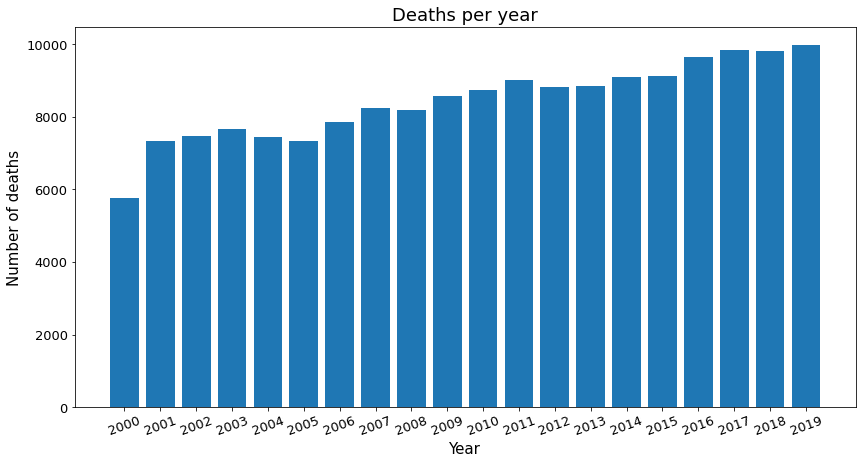

In [7]:
#-------------------------------------------------------------------#
#                          Deaths per year                          #
#-------------------------------------------------------------------#

#get absolute value of deaths per year
df_obitos['DTOBITO'] = pd.to_datetime(df_obitos['DTOBITO'])
year = pd.DataFrame(df_obitos['DTOBITO'].dt.strftime('%Y').value_counts())
year = year.reset_index()
year = year.sort_values(by=['index'])
year = year.rename(columns={'index':'Year','DTOBITO':'Count'})

#plot
plt.figure(figsize = (14,7))
plt.bar(year['Year'],year['Count'])
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Number of deaths',fontsize = 15)
plt.title('Deaths per year',fontsize=18)
plt.xticks(fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.show()

### Local do óbito
LOCOCOR, CODESTAB, ENDOCOR, CODENDOCOR, NUMENDOCOR, COMPLOCOR, CEPOCOR, BAIOCOR, CODBAIOCOR, CODMUNOCOR are columns with information refering to the place where the death occured.



In [8]:
lista_colunas = ['LOCOCOR', 'CODESTAB', 'ENDOCOR', 'CODENDOCOR', 'NUMENDOCOR', 'COMPLOCOR', 'CEPOCOR', 'BAIOCOR', 'CODBAIOCOR', 'CODMUNOCOR']

for coluna in lista_colunas:
  print(f"Percentage of rows without {coluna} filled:", round(len(df_obitos[df_obitos[f'{coluna}'].isnull()])/len(df_obitos[f'{coluna}'])*100,2), "%")

Percentage of rows without LOCOCOR filled: 0.0 %
Percentage of rows without CODESTAB filled: 19.57 %
Percentage of rows without ENDOCOR filled: 20.49 %
Percentage of rows without CODENDOCOR filled: 99.98 %
Percentage of rows without NUMENDOCOR filled: 20.93 %
Percentage of rows without COMPLOCOR filled: 95.59 %
Percentage of rows without CEPOCOR filled: 83.69 %
Percentage of rows without BAIOCOR filled: 27.87 %
Percentage of rows without CODBAIOCOR filled: 88.58 %
Percentage of rows without CODMUNOCOR filled: 0.0 %


CODMUNOCOR

Code of the city. Both 350950 and 3509502 refer to the city of Campinas. As 3509502 is the most uptaded, 350950 was replaced by 3509502.

See data from [IBGE](https://www.ibge.gov.br/explica/codigos-dos-municipios.php) (Brazilian Institute of Geography and Statistics) for more information.

**Problem:**
- 3.72% of the deaths are from cities different of Campinas
- Some of the codes refer to cities outside São Paulo

At this point, all rows were maintened, but later only rows with code 3509502 were kept.

In [9]:
df_obitos['CODMUNOCOR'] = df_obitos['CODMUNOCOR'].astype(str)
print("Percentage of rows with city of occurence different from Campinas (code is not 350950 or 3509502):", round(len(df_obitos[(df_obitos['CODMUNOCOR']!='350950') & (df_obitos['CODMUNOCOR']!='3509502')])/len(df_obitos['CODMUNOCOR'])*100,2),"%")

#padronize: only one code for Campinas
df_obitos['CODMUNOCOR'] = df_obitos['CODMUNOCOR'].replace('350950','3509502')

#possible values for CODMUOCOR
print("Possible city codes:", df_obitos['CODMUNOCOR'].unique())

Percentage of rows with city of occurence different from Campinas (code is not 350950 or 3509502): 3.72 %
Possible city codes: ['351530' '355040' '410730' '411007' '354700' '352020' '352360' '350220'
 '355240' '353180' '350030' '352470' '351410' '353710' '431177' '313440'
 '351280' '310730' '350790' '355670' '354060' '353650' '355540' '350970'
 '351040' '351907' '355620' '291920' '352260' '353930' '350410' '354580'
 '353080' '351050' '410640' '350610' '352050' '352340' '353070' '350330'
 '3509502' '410430' '315180' '354100' '510760' '354390' '352530' '354980'
 '350760' '350160' '310670' '350750' '350320' '355410' '353870' '352690'
 '352900' '431440' '313130' '350550' '410480' '354990' '352590' '354870'
 '500830' '355220' '354340' '313670' '500330' '500270' '351880' '350000'
 '520870' '261160' '310620' '355030' '313640' '354210' '355350' '350680'
 '412785' '310840' '352730' '312020' '353560' '355000' '314990' '354800'
 '352610' '411940' '351860' '315990' '410960' '353880' '350700' '3554

### Causa
CAUSABAS (base cause), LINHAA, LINHAB, LINHAC, LINHAD, LINHAII refer to the death.

For more information about this, see the [link](https://portalarquivos2.saude.gov.br/images/pdf/2015/agosto/14/Declaracao-de-Obito-WEB.pdf).


In [10]:
lista_colunas = ['CAUSABAS', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']

for coluna in lista_colunas:
  print(f"Percentage of rows with null {coluna}:", round(len(df_obitos[df_obitos[f'{coluna}'].isnull()])/len(df_obitos[f'{coluna}'])*100,2),"%")

Percentage of rows with null CAUSABAS: 0.0 %
Percentage of rows with null LINHAA: 0.44 %
Percentage of rows with null LINHAB: 11.29 %
Percentage of rows with null LINHAC: 42.31 %
Percentage of rows with null LINHAD: 76.68 %
Percentage of rows with null LINHAII: 51.04 %


Remove * from the beggining of strings.

In [14]:
#remove * in the beggining of the str
colunas = ['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']
for i in colunas:
  df_obitos[i] = df_obitos[i].str.replace('*','')

### Others

Columns refering to the occurence of medical assistence, cirurgy or necropsy; coumns with information about the doctor, atestant and source; columns refering to job accident and circunstance of death.

These columns don't have relevant information for the intended analysis.

In [ ]:
lista_colunas = ['ASSISTMED','EXAME','CIRURGIA','NECROPSIA','MEDICO','CRM','ATESTANTE','CONTATO','FONTE','ACIDTRAB','CIRCOBITO']

#% of values that aren't null (NaN) in each column
for coluna in lista_colunas:
  print(f"{coluna}:", round(len(df_obitos[~df_obitos[f'{coluna}'].isnull()])/len(df_obitos[f'{coluna}'])*100,2),"%")

ASSISTMED: 73.13 %
EXAME: 37.17 %
CIRURGIA: 36.72 %
NECROPSIA: 85.09 %
MEDICO: 25.78 %
CRM: 99.88 %
ATESTANTE: 97.05 %
CONTATO: 92.93 %
FONTE: 7.57 %
ACIDTRAB: 3.34 %
CIRCOBITO: 10.36 %


## Information related to the patient

### NUMSUS

Number of Brazil's Unified Public Health System (SUS). Each patient should have an unique number. However, few rows have this column filled and many of them have absurd values or values repeated for different patients.

It is not a column with trustworthy data.



In [11]:
#null rows
print("Percentage of rows with null NUMSUS:", round((len(df_obitos[~df_obitos['NUMSUS'].isnull()])/len(df_obitos['NUMSUS']))*100,2),"%")

#duplicated values
df2 = df_obitos[(~df_obitos['NUMSUS'].isnull()) & (df_obitos.duplicated(['NUMSUS'],keep=False))]
print("Number of rows with duplicated NUMSUS:",len(df2))

Percentage of rows with null NUMSUS: 3.72 %
Number of rows with duplicated NUMSUS: 21


### NATURAL

Citizenship according to the table of countries. Brazilian citizenship is characterized by the first digit 8 and the [code of UF](https://www.oobj.com.br/bc/article/quais-os-c%C3%B3digos-de-cada-uf-no-brasil-465.html).

The code for the state of São Paulo would be 835.

This column is not filled in many rows.


In [12]:
print("Possible citizenships:",df_obitos['NATURAL'].unique())
print('\n')

#null values
pct_fill = len(df_obitos[~df_obitos['NATURAL'].isnull()])/len(df_obitos['NATURAL'])
print("Percentage of filled rows:", round(pct_fill*100, 2), "%")
      
#from SP ('835')
df_obitos['NATURAL'] = df_obitos['NATURAL'].astype(str)
pct_sp = len(df_obitos[df_obitos['NATURAL'].str.contains('835')])/len(df_obitos['NATURAL'])
print("Percentage of rows from outside SP:", round(pct_sp*100, 2), "%")

Possible citizenships: [ nan 835. 841. 822. 826. 831. 800. 829. 190. 842. 821. 833. 851. 828.
 823.  52. 850.  53. 125.  16. 832.  77. 852. 815. 827. 824.  78. 825.
 843.  87. 999. 127. 249. 266.   8. 225. 134.  37. 811.   4. 199. 119.
 184. 110. 186. 813.  58.  27. 114.  20.  10. 201. 188. 135. 812.  33.
 171.  82.  99. 853. 816. 218.  72.  66. 117. 817.  63. 139. 814.  62.
  35.  39. 268. 224. 159. 120. 275.  68.  81. 152. 137. 103. 269. 265.
 118. 182.  19. 161. 156.   2. 157. 107. 193. 226. 109. 181.  41.  79.
 253. 259.  92.  45. 271.  44.  75. 126. 124.  86. 141.  94.  49. 258.
  85.  98. 244. 232.  76. 245. 129.  31.   1.  65.  80.  84.  83.  97.
  71. 170.  60.   0.  13.  90.  70.  73.  11.  74. 121.]


Percentage of filled rows: 53.54 %
Percentage of rows from outside SP: 34.48 %


### NOMES

THe database has the variables NOME (name), NOMEPAI (father's name) and NOMEMÃE (mother's name). All of them have a low percentage of null values or are filled with  'IGNORADO'(ignored) or 'DESCONHECIDO'(unknown).

**Problems:**
- Same name and parents name but different death dates
- Same name and parents name but different birthdates

**Solutions:**
- These rows were discarded (21 rows in )

In [15]:
#null rows
print("Percentage of rows without name:", round((len(df_obitos[df_obitos['NOME'].isnull()])/len(df_obitos['NOME']))*100,2))
print("Percentage of rows with name as ignored or unknown:",round(len(df_obitos[(df_obitos['NOME']=='IGNORADO') | (df_obitos['NOME']=='DESCONHECIDO')])/len(df_obitos['NOME'])*100,2),"%")
print("Percentage of rows without father's name (NaN, ignored, unknown):", round(len(df_obitos[(df_obitos['NOMEPAI'].isnull()) | (df_obitos['NOMEPAI']=='IGNORADO') | (df_obitos['NOMEPAI']=='DESCONHECIDO')])/len(df_obitos['NOMEPAI'])*100,2),"%")
print("Percentage of rows without mothers's name (NaN, ignored, unknown):", round(len(df_obitos[(df_obitos['NOMEMAE'].isnull()) | (df_obitos['NOMEMAE']=='IGNORADO') | (df_obitos['NOMEMAE']=='DESCONHECIDO')])/len(df_obitos['NOMEMAE'])*100,2),"%")

#duplicated -> create a auxiliar dataframe
df2 = df_obitos[(~df_obitos['NOME'].str.contains('IGNORADO')) & (~df_obitos['NOME'].str.contains('DESCONHECIDO')) & (df_obitos.duplicated(['NOME','NOMEPAI','NOMEMAE'],keep=False))].sort_values('NOME')

#drop duplicated
comparison_df = df_obitos.merge(df2, indicator=True, how='outer')
df_obitos = comparison_df[comparison_df['_merge'] == 'left_only']
del df_obitos['_merge']

Percentage of rows without name: 0.0
Percentage of rows with name as ignored or unknown: 0.02 %
Percentage of rows without father's name (NaN, ignored, unknown): 5.31 %
Percentage of rows without mothers's name (NaN, ignored, unknown): 0.17 %


### DATNASC e IDADE

Birthdate was in the ddmmyyyy format. It was converted %Y-%m-%d.

Age: 
- Beggining in 0, second subfield in minutes (020 = 20 minutes)
- Beggining in 1, second subfield in hours (102 = 2 hours)
- Beggining in 2, second subfield in days (201 = 1 day)
- Beggining in 3, second subfield in months (301 = 1 month)
- Beggining in 4, second subfield in years (409 = 9 years)
- Beggining in 5, second subfield in more tha 100 years (506 = 106 years)

The columns refering to child deaths (less than one year) were dropped. This columns are the one with age less than 400.

If the filed started with 4, the two following digits were kept. If it started with 5, the 5 was replaced by 1.

**Problems:**
- Rows without age or birthdate will disturb stratified analysis
- By recalculating the age as (date of death - birthdate), incorrect values were found
- Incorrect values for the birthdate

**Solution:** (in order to have a higher quality of data)
- Rows without birthdate were discarded (807 rows) and the age was reclaculated from the birthdate and date of death 
- Rows with birthdate equal to date of death were discarded (4 rows) 


In [16]:
#check for null rows
print("Number of rows without birthdate:", len(df_obitos[df_obitos['DTNASC'].isnull()]))
print("Number of rows without age:", len(df_obitos[df_obitos['IDADE'].isnull()]))
print("Number of rows without birthdate and age:",len(df_obitos[(df_obitos['IDADE'].isnull()) & (df_obitos['DTNASC'].isnull())]))

#drop rows without birthdate
df_obitos = df_obitos[~df_obitos['DTNASC'].isnull()]

# date to '%Y-%m-%d' format
df_obitos['DTNASC'] = df_obitos['DTNASC'].astype(str)
df_obitos['DTNASC'] = df_obitos['DTNASC'].map(lambda s: s[0:7] if len(s)==9 else s[0:8]) #remove the .0 at the end of the str
df_obitos['DTNASC'] = df_obitos['DTNASC'].map(lambda s: "0" + s if len(s)==7 else s) #add 0 if str has only 7 digits
df_obitos.loc[:,'DTNASC'] = pd.to_datetime(df_obitos.loc[:,'DTNASC'],format = '%d%m%Y',errors='coerce').dt.strftime('%Y-%m-%d')

Number of rows without birthdate: 807
Number of rows without age: 43
Number of rows without birthdate and age: 43


In [17]:
#drop rows with age less than 1 year
print("Number of rows with age less than 1 year:", len(df_obitos[df_obitos['IDADE']<=400]))
df_obitos = df_obitos[df_obitos['IDADE']>400]

#drop 4 for str beggining in 4, replace 5 by 1 in strings beginning in 5
df_obitos.loc[:,'IDADE'] = df_obitos.loc[:,'IDADE'].astype(str)
df_obitos.loc[:,'IDADE'] = df_obitos.loc[:,'IDADE'].map(lambda s: "{}".format(s[1:3]) if s[0] == "4" else "1{}".format(s[1:3]))
df_obitos.loc[:,'IDADE'] = df_obitos.loc[:,'IDADE'].astype(int)

Number of rows with age less than 1 year: 5474


In [18]:
#create df_aux
df_aux = df_obitos.loc[:,['NOME','DTOBITO','DTNASC','IDADE']]
df_aux['DTOBITO'] = pd.to_datetime(df_aux['DTOBITO'])
df_aux['DTNASC'] = pd.to_datetime(df_aux['DTNASC'])

#recalculate age as date request - birthdate
df_aux.loc[:,'IDADE2'] = df_aux.loc[:,'DTOBITO'] - df_aux.loc[:,'DTNASC']
df_aux.loc[:,'IDADE2'] = df_aux.loc[:,'IDADE2'].dt.days
df_aux.loc[:,'IDADE2'] = df_aux.loc[:,'IDADE2']//365.25 #convert days into years

#compare age from dataframe with age recalculated
df_aux.loc[:,'DIF'] = df_aux.loc[:,'IDADE'] - df_aux.loc[:,'IDADE2']
df2 = df_aux[(~df_aux['DIF'].isnull()) & (df_aux['DIF']!=0)].sort_values('DIF') # difference between those values
df2[['IDADE','IDADE2','DIF']]

,IDADE,IDADE2,DIF
23,14,13,1
102303,19,18,1
102894,79,78,1
103083,59,58,1
103339,39,38,1
...,...,...,...
168708,54,53,1
130484,36,0,36
146090,46,0,46
126420,75,0,75


In [19]:
#recalculate age as date request - birthdate
df_obitos['DTOBITO'] = pd.to_datetime(df_obitos['DTOBITO'])
df_obitos['DTNASC'] = pd.to_datetime(df_obitos['DTNASC'])
df_obitos.loc[:,'IDADE'] = df_obitos.loc[:,'DTOBITO'] - df_obitos.loc[:,'DTNASC']
df_obitos.loc[:,'IDADE'] = df_obitos.loc[:,'IDADE'].dt.days
df_obitos.loc[:,'IDADE'] = df_obitos.loc[:,'IDADE']//365.25 #convert days into years

In [20]:
#drop columns with same datebirth and date of death
print("Number of rows with birthdate equal to date of death:", len(df_obitos[df_obitos['DTOBITO']==df_obitos['DTNASC']]))
df_obitos = df_obitos[df_obitos['DTOBITO']!=df_obitos['DTNASC']]

Number of rows with birthdate equal to date of death: 4


### SEXO

Drop rows with sex as ignored.

In [21]:
#check for null rows
#print(len(df_obitos[df_obitos['SEXO'].isnull()]))

# drop rows with sex as 'I'
print("Number of rows with sex as 'I':",len(df_obitos[df_obitos['SEXO']=='I']))
df_obitos = df_obitos[df_obitos['SEXO']!='I']

Number of rows with sex as 'I': 1


### RACACOR

Ethnicity:
- 1:white, 
- 2:black, 
- 3:yellow, 
- 4:brown, 
- 5:indian


In [22]:
print("Percentage of rows without ethnicity:",round(len(df_obitos[df_obitos['RACACOR'].isnull()])/len(df_obitos['RACACOR'])*100,2),"%")

Percentage of rows without ethnicity: 1.98 %


### Address

ENDRES, CODENDRES, NUMRES, COMPLRES, CEPRES, BAIRES, CODBAIRES, CODMUNRES refer to the address.


In [23]:
lista_colunas = ['ENDRES', 'CODENDRES', 'NUMRES', 'COMPLRES', 'CEPRES', 'BAIRES', 'CODBAIRES', 'CODMUNRES']

for coluna in lista_colunas:
  print(f"Percetage of rows without {coluna}:", round(len(df_obitos[df_obitos[f'{coluna}'].isnull()])/len(df_obitos[f'{coluna}'])*100,2),"%")

Percetage of rows without ENDRES: 0.11 %
Percetage of rows without CODENDRES: 99.97 %
Percetage of rows without NUMRES: 1.22 %
Percetage of rows without COMPLRES: 1.45 %
Percetage of rows without CEPRES: 58.31 %
Percetage of rows without BAIRES: 22.42 %
Percetage of rows without CODBAIRES: 23.43 %
Percetage of rows without CODMUNRES: 0.0 %


CODMUNRES

City of residence.

Code of the city of Campinas was padronized as 3509502 (same of what was done for the city of occurence).

Almost 23.64% of the people in the database has a city of residence different from Campinas (which not necessarily mean they did not live in Campinas.)


In [24]:
df_obitos['CODMUNRES'] = df_obitos['CODMUNRES'].astype(str)
print("Percentage of rows with city of residence different from Campinas(350950 or 3509502):", round(len(df_obitos[(df_obitos['CODMUNRES']!='350950')&(df_obitos['CODMUNRES']!='3509502')])/len(df_obitos['CODMUNRES'])*100,2),"%")

#padronize: only one code for Campinas
df_obitos['CODMUNRES'] = df_obitos['CODMUNRES'].replace('350950','3509502')

Percentage of rows with city of residence different from Campinas(350950 or 3509502): 23.38 %


## Drop columns

Drop columns that are not relevant for the intended analysis.

In [25]:
#refering to fetal ou child deaths
df_obitos = df_obitos.drop(columns = {'IDADEMAE','ESCMAE','OCUPMAE','QTDFILVIVO',
                                      'QTDFILMORT','GRAVIDEZ','GESTACAO','PARTO',
                                      'OBITOPARTO','PESO','ESCMAE2010',	'SERIESCMAE',
                                      'SEMAGESTAC','TIPOBITO','NUMERODN'})

#refering to the place of death (kept only the code of the city)
df_obitos = df_obitos.drop(columns = {'LOCOCOR', 'CODESTAB', 'ENDOCOR', 'CODENDOCOR',
                                      'NUMENDOCOR', 'COMPLOCOR', 'CEPOCOR', 'BAIOCOR', 
                                      'CODBAIOCOR','CODESTOCOR','CODREGOCOR',	'CODDISOCOR'})

#refering to the place of residence (kept only the code of the city and the neighborhood)
df_obitos = df_obitos.drop(columns = {'ENDRES', 'CODENDRES', 'NUMRES', 'CEPRES',
                                      'BAIRES', 'CODBAIRES','CODDISRES','CODPAISRES',
                                      'CODESTRES','CODREGRES'})

#medical information
df_obitos = df_obitos.drop(columns = {'ASSISTMED','EXAME','CIRURGIA','NECROPSIA','MEDICO','CRM',
                                      'ATESTANTE','CONTATO','FONTE','ACIDTRAB','CIRCOBITO','REGRA'})

#nunsus and natural (low pct of filled rows and non confiable info)
df_obitos = df_obitos.drop(columns = {'NUMSUS','NATURAL'})

#names, birthdate, and numerodo (confidentiality)
df_obitos = df_obitos.drop(columns = {'NOME','NOMEPAI','NOMEMAE','DTNASC','NUMERODO'})

#other
df_obitos = df_obitos.drop(columns = {'ESTCIV','ESC','OCUP','ESC2010','OBITOGRAV','DTATESTADO',
                                      'ENDACID',	'DESCACID', 'CODENDACID',	'NUMENDACID',	'COMPLACID',
                                      'CEPACID','OBITOPUERP'})

## Year and city

Keep data only from city of occurence as Campinas and from 2001 and foward (drop data from 2000).

In [26]:
#city of occurence as Campinas
df_obitos = df_obitos[df_obitos['CODMUNOCOR']=='3509502']

#from 2001 foward
df_obitos = df_obitos[df_obitos['DTOBITO']>='2001-01-01']

In [ ]:
#Save data
df_obitos.to_csv('obitos_completo.csv')

## Cirulatory

Circulatory deaths were considered as the ones with one of the columns: CAUSABAS, LINHAA, LINHAB, LINHAC, LINHAD refering to an circulatory ICD (I00-I99).

In [27]:
#when one of the causes of death has a circulatory cid
df_circ = df_obitos[(df_obitos['CAUSABAS'].str.contains('I')) | (df_obitos['LINHAA'].str.contains('I')) | (df_obitos['LINHAB'].str.contains('I')) | (df_obitos['LINHAC'].str.contains('I')) | (df_obitos['LINHAD'].str.contains('I'))]

Column to indicate which ICD resulted in the classification as circualtory (priority order was CAUSABAS, LINHAD, LINHAC, LINHAB, LINHAA).

In [28]:
conditions = [(df_circ['CAUSABAS'].str.contains('I',na=False)), (df_circ['LINHAD'].str.contains('I',na=False)),
              (df_circ['LINHAC'].str.contains('I',na=False)), (df_circ['LINHAB'].str.contains('I',na=False)),
              (df_circ['LINHAA'].str.contains('I',na=False))]

choices = [df_circ['CAUSABAS'], df_circ['LINHAD'], df_circ['LINHAC'],df_circ['LINHAB'],df_circ['LINHAA']]
df_circ['CID'] = np.select(conditions, choices)

In [ ]:
#Save data
df_circ.to_csv('obitos_circulatorio.csv')

## Respiratory

Respiratory deaths were considered as the ones with one of the columns: CAUSABAS, LINHAA, LINHAB, LINHAC, LINHAD refering to an circulatory ICD (J00-J99).

In [29]:
#when one of the causes of death has a respiratory cid
df_resp = df_obitos[(df_obitos['CAUSABAS'].str.contains('J')) | (df_obitos['LINHAA'].str.contains('J')) | (df_obitos['LINHAB'].str.contains('J')) | (df_obitos['LINHAC'].str.contains('J')) | (df_obitos['LINHAD'].str.contains('J'))]

Column to indicate which ICD resulted in the classification as circualtory (priority order was CAUSABAS, LINHAD, LINHAC, LINHAB, LINHAA).

In [30]:
conditions = [(df_resp['CAUSABAS'].str.contains('J',na=False)), (df_resp['LINHAD'].str.contains('J',na=False)),
              (df_resp['LINHAC'].str.contains('J',na=False)), (df_resp['LINHAB'].str.contains('J',na=False)),
              (df_resp['LINHAA'].str.contains('J',na=False))]

choices = [df_resp['CAUSABAS'], df_resp['LINHAD'], df_resp['LINHAC'],df_resp['LINHAB'],df_resp['LINHAA']]
df_resp['CID'] = np.select(conditions, choices)

In [ ]:
# Save data
df_resp.to_csv('obitos_respiratorio.csv')